In [1]:
import numpy as np
import pandas as pd
import datetime #时间运算库
import pickle
import os
import matplotlib.pyplot as plt

import pylab
pylab.rcParams['figure.figsize'] = (15.0, 8.0) # 显示大小

In [2]:
#转换数据类型
def float2int(x):
    try:
        x = int(x)
    except Exception as err:
            x = int(-1)
    return x

def convert_variable_type(df_user, df_product, df_comment, df_action):
    df_user_tmp = df_user.copy()
    df_product_tmp = df_product.copy()
    df_comment_tmp = df_comment.copy()
    df_action_tmp = df_action.copy()
    
    print("before convert: ", df_user_tmp.dtypes)
    df_user_tmp.loc[:, "age"] = df_user_tmp.loc[:, "age"].apply(float2int)
    df_user_tmp.loc[:, "sex"] = df_user_tmp.loc[:, "sex"].apply(float2int)
    print("after convert: ", df_user_tmp.dtypes)
    
    print("before convert: ", df_product_tmp.dtypes) #不需要转数据类型
    
    print("before convert: ", df_comment_tmp.dtypes)
    df_comment_tmp.loc[:, "dt"] = df_comment_tmp.loc[:, "dt"] \
        .apply(lambda x : datetime.datetime.strptime(str(x), "%Y-%m-%d"))
    print("after convert: ", df_comment_tmp.dtypes)
    
    print("before convert: ", df_action_tmp.dtypes)  #不需要转数据类型
    df_action_tmp.loc[:, "time"] = df_action_tmp.loc[:, "time"] \
        .apply(lambda x : datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S"))
    print("after convert: ", df_action_tmp.dtypes)
    
    return df_user_tmp, df_product_tmp, df_comment_tmp, df_action_tmp

In [15]:
############读取所有的文件#########################
def read_files():
    
    if not os.path.exists("data.pkl"):#os即operating system（操作系统），os.path模块主要用于文件的属性获取
        #用户表
        df_user = pd.read_csv("JData_User.csv")#读取csv文件：pd.read_csv()
        #商品表
        df_product = pd.read_csv("JData_Product.csv")
        #评论表
        df_comment = pd.read_csv("JData_Comment.csv")
        #行为表
        df_action_1 = pd.read_csv("JData_Action_201602.csv")
        df_action_2 = pd.read_csv("JData_Action_201603.csv")
        df_action_3 = pd.read_csv("JData_Action_201604.csv")
        df_action = pd.concat([df_action_1, df_action_2, df_action_3], axis=0)
        
        df_user, _, _, df_action = convert_variable_type(df_user, pd.DataFrame(), pd.DataFrame(), df_action)#DataFrame分布式数据集
        #convert_variable_type转换变量类型
        
        #以下是读写操作
        with open("data.pkl", "wb") as f: # wb:以二进制格式打开一个文件只用于写入。如果该文件已存在则将其覆盖。如果该文件不存在，创建新文件。
            pickle.dump((df_user, df_product, df_comment, df_action), f)     # pickle.dump(obj, file[, protocol]）序列化对象
        
    else:
        with open("data.pkl", "rb") as f:
            df_user, df_product, df_comment, df_action = pickle.load(f) #反序列化对象   ？？？
#             加载存储到磁盘的序列化对象到内存中，也就是读取pkl文件
#             因为我存储的是一个tuple（元祖），所以左边可以用逗号隔开，表示tuple对应位置的元素，类似于：
#             tup = tuple(tp0, tp1, tp2)
#             obj1， obj2， obj3 = tup[0], tup[1], tup[2]
        
    return df_user, df_product, df_comment, df_action

df_user, df_product, df_comment, df_action = read_files()   #这个，号是连接

In [14]:
df_user = pd.read_csv("JData_User.csv")
df_user.loc[:, "user_reg_tm"] = df_user.loc[:, "user_reg_tm"].apply(lambda x : pd.to_datetime(x))  #1.apply()用一个对象替换另一个对象2.loc:通过行标签索引数据3.lambda函数有输入输出4.pd.to_datetime将该列数据转换为时间类型
df_user_after_415 = df_user.loc[df_user.loc[:, "user_reg_tm"] > pd.to_datetime("2016-04-15")]
df_user = df_user.loc[df_user.loc[:, "user_reg_tm"] < pd.to_datetime("2016-04-15")]

In [52]:
print(df_user.head())
df_208546_action = df_action.loc[df_action.loc[:, "user_id"] == 208546]
print(df_208546_action.head())

   user_id  age  sex  user_lv_cd user_reg_tm
0   200001    6    2           5  2016-01-26
1   200002   -1    0           1  2016-01-26
2   200003    4    1           4  2016-01-26
3   200004   -1    2           1  2016-01-26
4   200005    2    0           4  2016-01-26
          user_id  sku_id                time  model_id  type  cate  brand
11187198   208546   70936 2016-02-29 15:51:44       NaN     1     4    885
369649     208546  139567 2016-03-01 13:59:24       NaN     1     5    885
1690366    208546  164346 2016-03-03 10:13:00       NaN     1     4    675
1895357    208546  108328 2016-03-03 16:00:13       NaN     1     5    800
2390098    208546   13931 2016-03-04 09:09:53       NaN     1     5    159


   user_id  sku_id  type  cate                time
0   266079  138778     1     8 2016-01-31 23:59:02
1   266079  138778     6     8 2016-01-31 23:59:03
2   200719   61226     1     8 2016-01-31 23:59:07
3   200719   61226     6     8 2016-01-31 23:59:08
4   263587   72348     1     5 2016-01-31 23:59:08
      user_id  sku_id  type  cate                time  weekday
351    269365  166345     4     9 2016-02-01 00:01:00        0
649    235443   36692     4     4 2016-02-01 00:02:00        0
980    247689    9112     4     5 2016-02-01 00:03:00        0
1719   273959  102034     4     5 2016-02-01 00:05:00        0
2153   226791  163550     4     4 2016-02-01 00:06:00        0
6162
1844
7759
---------
6946
1996
8869
---------
5001
1800
6262
---------
6409
1805
8078
---------
6049
1855
7505
---------
4174
1643
5143
---------
3710
1578
4636
---------


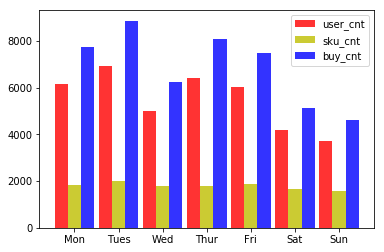

In [21]:
def buy_user_cnt_on_weekdays(df_action):
    df_action_tmp = df_action.loc[:, ["user_id", "sku_id", "type", "cate", "time"]].copy()  #TMP和TEMP文件是各种软件或系统产生的临时文件
    print(df_action_tmp.head())    #第一次打印
    df_action_tmp = df_action_tmp.loc[df_action_tmp.loc[:, "type"] == 4]
    df_action_tmp.loc[:, "weekday"] = df_action_tmp.loc[:, "time"].apply(lambda x : x.weekday())   #第二次打印覆盖
    print(df_action_tmp.head())
    
    weekdays = ["Mon", "Tues", "Wed", "Thur", "Fri", "Sat", "Sun"]
    x = np.arange(len(weekdays))
    user_cnt = [] #[]表示list列表数据类型
    sku_cnt = []
    user_sku_cnt = []
    bar_width=0.3
    
    for i in range(7):
        df_user_buy_week = df_action_tmp.loc[df_action_tmp.loc[:, "weekday"] == i]
        groups_by_user_id = df_user_buy_week.groupby("user_id")
        groups_by_sku_id = df_user_buy_week.groupby("sku_id")
        
        user_cnt.append(len(groups_by_user_id)) #在列表末尾加新对象
        sku_cnt.append(len(groups_by_sku_id))
        user_sku_cnt.append(len(df_user_buy_week))
        
        print(len(groups_by_user_id))
        print(len(groups_by_sku_id))
        print(len(df_user_buy_week))
        print("---------")
    plt.bar(x=x, height=user_cnt, label="user_cnt", color='r', alpha=0.8, width=bar_width)
    plt.bar(x=x+bar_width, height=sku_cnt, tick_label=weekdays, label="sku_cnt", color='y', alpha=0.8, width=bar_width)
    plt.bar(x=x+2*bar_width, height=user_sku_cnt, label="buy_cnt", color='b', alpha=0.8, width=bar_width)
    plt.legend()
    plt.savefig("./figs/buy_user_cnt_on_weekdays.png", dpi=600)
    plt.show()
    
buy_user_cnt_on_weekdays(df_action)

In [110]:
def buy_user_cnt_on_days(df_action, start_time, end_time):
    df_action_tmp = df_action.loc[:, ["user_id", "sku_id", "type", "time"]].copy()
    df_action_tmp = df_action_tmp.loc[(df_action_tmp.loc[:, "time"] >= start_time) \
                                      & (df_action_tmp.loc[:, "time"] <= end_time)]
#     print(df_action_tmp.head())
    df_action_tmp = df_action_tmp.loc[df_action_tmp.loc[:, "type"] == 4]
    df_action_tmp.loc[:, "day"] = df_action_tmp.loc[:, "time"].apply(lambda x : x.day)
#     df_action_tmp= df_action_tmp.reset_index()
#     print(df_action_tmp.head())

    days = np.arange(1, 32)
    x = np.arange(len(days))
    user_cnt = []
    sku_cnt = []
    user_sku_cnt = []
    bar_width=0.3
    
    for i in range(1, 32):
        print(i, " ---------------")
        df_user_buy_day = df_action_tmp.loc[df_action_tmp.loc[:, "day"] == i]
        groups_by_user_id = df_user_buy_day.groupby("user_id")
        groups_by_sku_id = df_user_buy_day.groupby("sku_id")
        
        user_cnt.append(len(groups_by_user_id))
        sku_cnt.append(len(groups_by_sku_id))
        user_sku_cnt.append(len(df_user_buy_day))
        
        print(len(groups_by_user_id))
        print(len(groups_by_sku_id))
        print(len(df_user_buy_day))
        
    plt.bar(x=x, height=user_cnt, label="user_cnt", color='r', alpha=0.8, width=bar_width)
    plt.bar(x=x+bar_width, height=sku_cnt, tick_label=days, label="sku_cnt", color='y', alpha=0.8, width=bar_width)
    plt.bar(x=x+2*bar_width, height=user_sku_cnt, label="buy_cnt", color='b', alpha=0.8, width=bar_width)
    plt.legend()
    plt.show()
        

1  ---------------
458
354
543
2  ---------------
383
311
462
3  ---------------
302
255
357
4  ---------------
256
213
297
5  ---------------
160
147
179
6  ---------------
120
114
134
7  ---------------
82
93
107
8  ---------------
100
96
109
9  ---------------
113
106
127
10  ---------------
121
128
150
11  ---------------
190
183
219
12  ---------------
216
190
243
13  ---------------
271
259
328
14  ---------------
354
290
412
15  ---------------
409
344
489
16  ---------------
458
385
566
17  ---------------
533
415
633
18  ---------------
419
335
497
19  ---------------
429
356
514
20  ---------------
386
329
450
21  ---------------
337
290
401
22  ---------------
501
381
608
23  ---------------
423
362
523
24  ---------------
421
323
497
25  ---------------
448
362
556
26  ---------------
487
395
571
27  ---------------
425
336
515
28  ---------------
405
315
502
29  ---------------
431
318
500
30  ---------------
0
0
0
31  ---------------
0
0
0


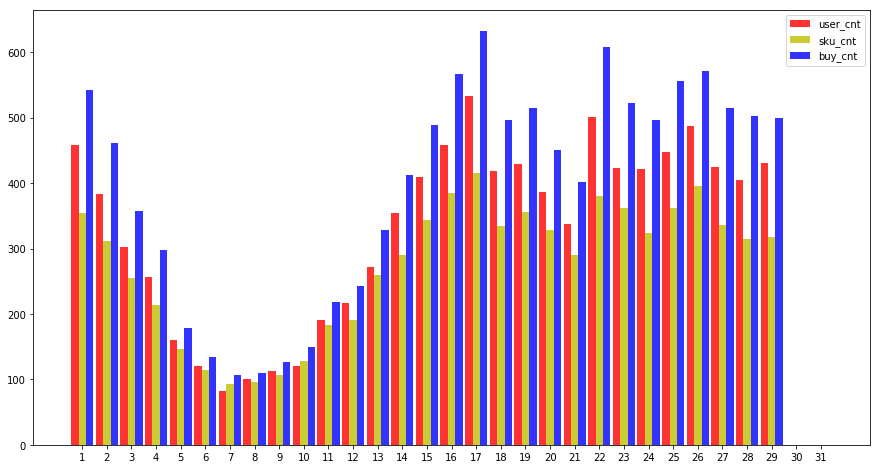

In [111]:
buy_user_cnt_on_days(df_action, pd.to_datetime("2016-02-01"), pd.to_datetime("2016-03-01"))

1  ---------------
914
552
1141
2  ---------------
554
437
685
3  ---------------
540
389
634
4  ---------------
565
427
700
5  ---------------
478
356
563
6  ---------------
473
387
587
7  ---------------
1183
601
1416
8  ---------------
609
460
757
9  ---------------
492
408
601
10  ---------------
775
489
929
11  ---------------
685
483
814
12  ---------------
594
408
703
13  ---------------
444
387
542
14  ---------------
1270
682
1548
15  ---------------
2333
946
2829
16  ---------------
855
630
1014
17  ---------------
459
375
552
18  ---------------
529
422
640
19  ---------------
415
366
531
20  ---------------
374
327
453
21  ---------------
545
389
655
22  ---------------
471
364
557
23  ---------------
433
367
495
24  ---------------
487
399
609
25  ---------------
722
478
846
26  ---------------
407
352
501
27  ---------------
411
352
507
28  ---------------
567
423
685
29  ---------------
635
425
737
30  ---------------
481
403
584
31  ---------------
593
407
674


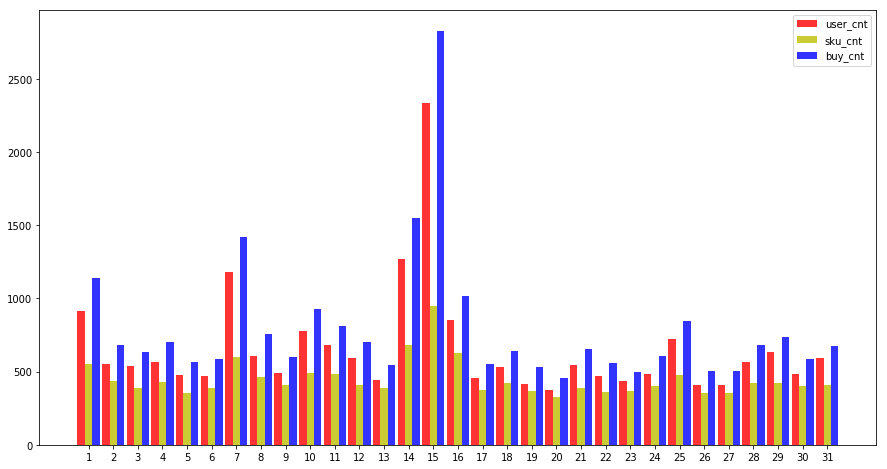

In [112]:
buy_user_cnt_on_days(df_action, pd.to_datetime("2016-03-01"), pd.to_datetime("2016-04-01"))

1  ---------------
613
396
685
2  ---------------
508
363
567
3  ---------------
445
343
515
4  ---------------
471
357
529
5  ---------------
489
364
568
6  ---------------
475
339
534
7  ---------------
871
498
997
8  ---------------
1150
576
1332
9  ---------------
739
474
851
10  ---------------
546
378
610
11  ---------------
597
418
681
12  ---------------
516
365
603
13  ---------------
573
357
712
14  ---------------
1763
558
2114
15  ---------------
859
505
981
16  ---------------
0
0
0
17  ---------------
0
0
0
18  ---------------
0
0
0
19  ---------------
0
0
0
20  ---------------
0
0
0
21  ---------------
0
0
0
22  ---------------
0
0
0
23  ---------------
0
0
0
24  ---------------
0
0
0
25  ---------------
0
0
0
26  ---------------
0
0
0
27  ---------------
0
0
0
28  ---------------
0
0
0
29  ---------------
0
0
0
30  ---------------
0
0
0
31  ---------------
0
0
0


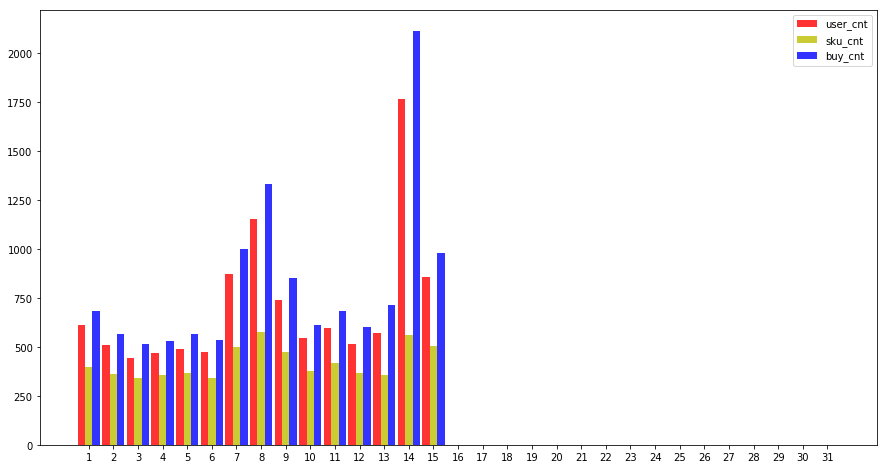

In [113]:
buy_user_cnt_on_days(df_action, pd.to_datetime("2016-04-01"), pd.to_datetime("2016-04-16"))

cate4_cnt 1466
cate5_cnt 1417
cate6_cnt 1162
cate7_cnt 1089
cate8_cnt 1892
cate9_cnt 691
cate10_cnt 39
cate11_cnt 3
---------
cate4_cnt 1421
cate5_cnt 1320
cate6_cnt 1103
cate7_cnt 1255
cate8_cnt 2866
cate9_cnt 872
cate10_cnt 32
cate11_cnt 0
---------
cate4_cnt 1270
cate5_cnt 1048
cate6_cnt 929
cate7_cnt 846
cate8_cnt 1567
cate9_cnt 566
cate10_cnt 32
cate11_cnt 4
---------
cate4_cnt 2155
cate5_cnt 1321
cate6_cnt 1149
cate7_cnt 827
cate8_cnt 2034
cate9_cnt 566
cate10_cnt 20
cate11_cnt 6
---------
cate4_cnt 1373
cate5_cnt 1253
cate6_cnt 1141
cate7_cnt 1012
cate8_cnt 2135
cate9_cnt 566
cate10_cnt 25
cate11_cnt 0
---------
cate4_cnt 811
cate5_cnt 937
cate6_cnt 820
cate7_cnt 601
cate8_cnt 1501
cate9_cnt 453
cate10_cnt 20
cate11_cnt 0
---------
cate4_cnt 830
cate5_cnt 842
cate6_cnt 678
cate7_cnt 584
cate8_cnt 1286
cate9_cnt 390
cate10_cnt 21
cate11_cnt 5
---------


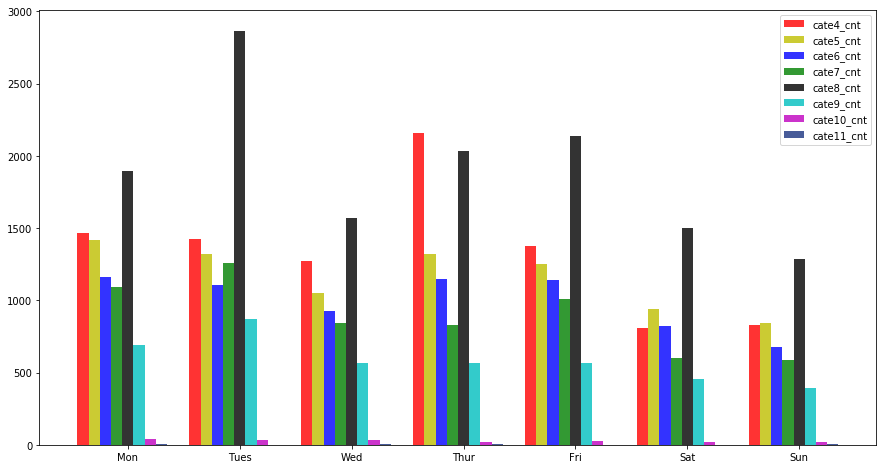

In [119]:
def buy_cate_cnt_on_weekdays(df_action):
    df_action_tmp = df_action.loc[:, ["user_id", "sku_id", "type", "cate", "time"]].copy()
#     print(df_action_tmp.head())
    df_action_tmp = df_action_tmp.loc[df_action_tmp.loc[:, "type"] == 4]
    df_action_tmp.loc[:, "weekday"] = df_action_tmp.loc[:, "time"].apply(lambda x : x.weekday())
#     print(df_action_tmp.head())

    weekdays = ["Mon", "Tues", "Wed", "Thur", "Fri", "Sat", "Sun"]
    x = np.arange(len(weekdays))
    cate4_list = []
    cate5_list = []
    cate6_list = []
    cate7_list = []
    cate8_list = []
    cate9_list = []
    cate10_list = []
    cate11_list = []
    bar_width=0.1

    for i in range(7):
        df_user_buy_week = df_action_tmp.loc[df_action_tmp.loc[:, "weekday"] == i]
        df_by_cate = df_user_buy_week.groupby("cate").count()
#         print(df_by_cate)
        cate4_cnt = df_by_cate.loc[4, "time"]
        cate5_cnt = df_by_cate.loc[5, "time"]
        cate6_cnt = df_by_cate.loc[6, "time"]
        cate7_cnt = df_by_cate.loc[7, "time"]
        cate8_cnt = df_by_cate.loc[8, "time"]
        cate9_cnt = df_by_cate.loc[9, "time"]
        cate10_cnt = df_by_cate.loc[10, "time"]
        cate11_cnt = 0 if 11 not in df_by_cate.index else df_by_cate.loc[11, "time"]
        
        cate4_list.append(cate4_cnt)
        cate5_list.append(cate5_cnt)
        cate6_list.append(cate6_cnt)
        cate7_list.append(cate7_cnt)
        cate8_list.append(cate8_cnt)
        cate9_list.append(cate9_cnt)
        cate10_list.append(cate10_cnt)
        cate11_list.append(cate11_cnt)
        
        
        print("cate4_cnt", cate4_cnt)
        print("cate5_cnt", cate5_cnt)
        print("cate6_cnt", cate6_cnt)
        print("cate7_cnt", cate7_cnt)
        print("cate8_cnt", cate8_cnt)
        print("cate9_cnt", cate9_cnt)
        print("cate10_cnt", cate10_cnt)
        print("cate11_cnt", cate11_cnt)
        print("---------")
#         print(list_user_buy_cnt_week[i])

    plt.bar(x=x, height=cate4_list, label="cate4_cnt", color='r', alpha=0.8, width=bar_width)
    plt.bar(x=x+bar_width, height=cate5_list, label="cate5_cnt", color='y', alpha=0.8, width=bar_width)
    plt.bar(x=x+2*bar_width, height=cate6_list, label="cate6_cnt", color='b', alpha=0.8, width=bar_width)
    plt.bar(x=x+3*bar_width, height=cate7_list, label="cate7_cnt", color='g', alpha=0.8, width=bar_width)
    plt.bar(x=x+4*bar_width, height=cate8_list, tick_label=weekdays, label="cate8_cnt", color='k', alpha=0.8, width=bar_width)
    plt.bar(x=x+5*bar_width, height=cate9_list, label="cate9_cnt", color='c', alpha=0.8, width=bar_width)
    plt.bar(x=x+6*bar_width, height=cate10_list, label="cate10_cnt", color='m', alpha=0.8, width=bar_width)
    plt.bar(x=x+7*bar_width, height=cate11_list, label="cate11_cnt", color=(0.1, 0.2, 0.5), alpha=0.8, width=bar_width)
    plt.legend()
    plt.show()
    
buy_cate_cnt_on_weekdays(df_action)

In [122]:
pylab.rcParams['figure.figsize'] = (20.0, 8.0) # 显示大小

def buy_cate_cnt_on_days(df_action, start_time, end_time):
    df_action_tmp = df_action.loc[:, ["user_id", "sku_id", "type", "cate", "time"]].copy()
    df_action_tmp = df_action_tmp.loc[(df_action_tmp.loc[:, "time"] >= start_time) \
                                      & (df_action_tmp.loc[:, "time"] <= end_time)]
#     print(df_action_tmp.head())
    df_action_tmp = df_action_tmp.loc[df_action_tmp.loc[:, "type"] == 4]
    df_action_tmp.loc[:, "day"] = df_action_tmp.loc[:, "time"].apply(lambda x : x.day)
    
    days = np.arange(1,31)
    x = np.arange(len(days))
    cate4_list = []
    cate5_list = []
    cate6_list = []
    cate7_list = []
    cate8_list = []
    cate9_list = []
    cate10_list = []
    cate11_list = []
    bar_width=0.1
    
    for i in range(1, 31):
        print(i, " ---------------")
        df_user_buy_week = df_action_tmp.loc[df_action_tmp.loc[:, "day"] == i]
        df_by_cate = df_user_buy_week.groupby("cate").count()
#         print(df_by_cate.T.head())
        
        cate4_cnt = 0 if 4 not in df_by_cate.index else df_by_cate.loc[4, "time"]
        cate5_cnt = 0 if 5 not in df_by_cate.index else df_by_cate.loc[5, "time"]
        cate6_cnt = 0 if 6 not in df_by_cate.index else df_by_cate.loc[6, "time"]
        cate7_cnt = 0 if 7 not in df_by_cate.index else df_by_cate.loc[7, "time"]
        cate8_cnt = 0 if 8 not in df_by_cate.index else df_by_cate.loc[8, "time"]
        cate9_cnt = 0 if 9 not in df_by_cate.index else df_by_cate.loc[9, "time"]
        cate10_cnt = 0 if 10 not in df_by_cate.index else df_by_cate.loc[10, "time"]
        cate11_cnt = 0 if 11 not in df_by_cate.index else df_by_cate.loc[11, "time"]
        
        cate4_list.append(cate4_cnt)
        cate5_list.append(cate5_cnt)
        cate6_list.append(cate6_cnt)
        cate7_list.append(cate7_cnt)
        cate8_list.append(cate8_cnt)
        cate9_list.append(cate9_cnt)
        cate10_list.append(cate10_cnt)
        cate11_list.append(cate11_cnt)
        
        print("cate4_cnt", cate4_cnt)
        print("cate5_cnt", cate5_cnt)
        print("cate6_cnt", cate6_cnt)
        print("cate7_cnt", cate7_cnt)
        print("cate8_cnt", cate8_cnt)
        print("cate9_cnt", cate9_cnt)
        print("cate10_cnt", cate10_cnt)
        print("cate11_cnt", cate11_cnt)
    
    plt.bar(x=x, height=cate4_list, label="cate4_cnt", color='r', alpha=0.8, width=bar_width)
    plt.bar(x=x+bar_width, height=cate5_list, label="cate5_cnt", color='y', alpha=0.8, width=bar_width)
    plt.bar(x=x+2*bar_width, height=cate6_list, label="cate6_cnt", color='b', alpha=0.8, width=bar_width)
    plt.bar(x=x+3*bar_width, height=cate7_list, label="cate7_cnt", color='g', alpha=0.8, width=bar_width)
    plt.bar(x=x+4*bar_width, height=cate8_list, tick_label=days, label="cate8_cnt", color='k', alpha=0.8, width=bar_width)
    plt.bar(x=x+5*bar_width, height=cate9_list, label="cate9_cnt", color='c', alpha=0.8, width=bar_width)
    plt.bar(x=x+6*bar_width, height=cate10_list, label="cate10_cnt", color='m', alpha=0.8, width=bar_width)
    plt.bar(x=x+7*bar_width, height=cate11_list, label="cate11_cnt", color=(0.1, 0.2, 0.5), alpha=0.8, width=bar_width)
    plt.legend()
    plt.show()
    

1  ---------------
cate4_cnt 99
cate5_cnt 144
cate6_cnt 93
cate7_cnt 279
cate8_cnt 284
cate9_cnt 240
cate10_cnt 2
cate11_cnt 0
2  ---------------
cate4_cnt 98
cate5_cnt 118
cate6_cnt 106
cate7_cnt 94
cate8_cnt 186
cate9_cnt 83
cate10_cnt 0
cate11_cnt 0
3  ---------------
cate4_cnt 66
cate5_cnt 118
cate6_cnt 76
cate7_cnt 108
cate8_cnt 199
cate9_cnt 64
cate10_cnt 1
cate11_cnt 2
4  ---------------
cate4_cnt 86
cate5_cnt 125
cate6_cnt 110
cate7_cnt 140
cate8_cnt 175
cate9_cnt 62
cate10_cnt 2
cate11_cnt 0
5  ---------------
cate4_cnt 66
cate5_cnt 87
cate6_cnt 74
cate7_cnt 85
cate8_cnt 195
cate9_cnt 53
cate10_cnt 3
cate11_cnt 0
6  ---------------
cate4_cnt 88
cate5_cnt 98
cate6_cnt 91
cate7_cnt 82
cate8_cnt 174
cate9_cnt 50
cate10_cnt 4
cate11_cnt 0
7  ---------------
cate4_cnt 274
cate5_cnt 220
cate6_cnt 230
cate7_cnt 143
cate8_cnt 431
cate9_cnt 112
cate10_cnt 6
cate11_cnt 0
8  ---------------
cate4_cnt 186
cate5_cnt 120
cate6_cnt 119
cate7_cnt 101
cate8_cnt 165
cate9_cnt 63
cate10_cnt 3
ca

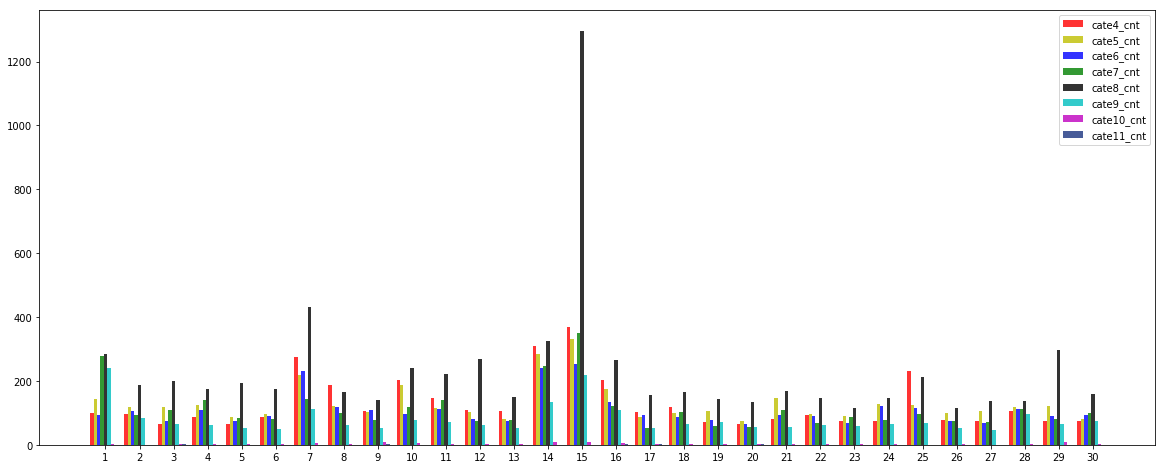

In [123]:
buy_cate_cnt_on_days(df_action, pd.to_datetime("2016-03-01"), pd.to_datetime("2016-04-01"))

1  ---------------
cate4_cnt 188
cate5_cnt 112
cate6_cnt 56
cate7_cnt 55
cate8_cnt 91
cate9_cnt 34
cate10_cnt 6
cate11_cnt 1
2  ---------------
cate4_cnt 145
cate5_cnt 91
cate6_cnt 72
cate7_cnt 51
cate8_cnt 84
cate9_cnt 18
cate10_cnt 1
cate11_cnt 0
3  ---------------
cate4_cnt 112
cate5_cnt 55
cate6_cnt 58
cate7_cnt 44
cate8_cnt 78
cate9_cnt 8
cate10_cnt 2
cate11_cnt 0
4  ---------------
cate4_cnt 97
cate5_cnt 69
cate6_cnt 50
cate7_cnt 24
cate8_cnt 47
cate9_cnt 9
cate10_cnt 0
cate11_cnt 1
5  ---------------
cate4_cnt 55
cate5_cnt 42
cate6_cnt 34
cate7_cnt 12
cate8_cnt 26
cate9_cnt 7
cate10_cnt 3
cate11_cnt 0
6  ---------------
cate4_cnt 46
cate5_cnt 32
cate6_cnt 19
cate7_cnt 11
cate8_cnt 17
cate9_cnt 8
cate10_cnt 1
cate11_cnt 0
7  ---------------
cate4_cnt 26
cate5_cnt 31
cate6_cnt 18
cate7_cnt 18
cate8_cnt 11
cate9_cnt 3
cate10_cnt 0
cate11_cnt 0
8  ---------------
cate4_cnt 32
cate5_cnt 18
cate6_cnt 14
cate7_cnt 17
cate8_cnt 25
cate9_cnt 3
cate10_cnt 0
cate11_cnt 0
9  ---------------

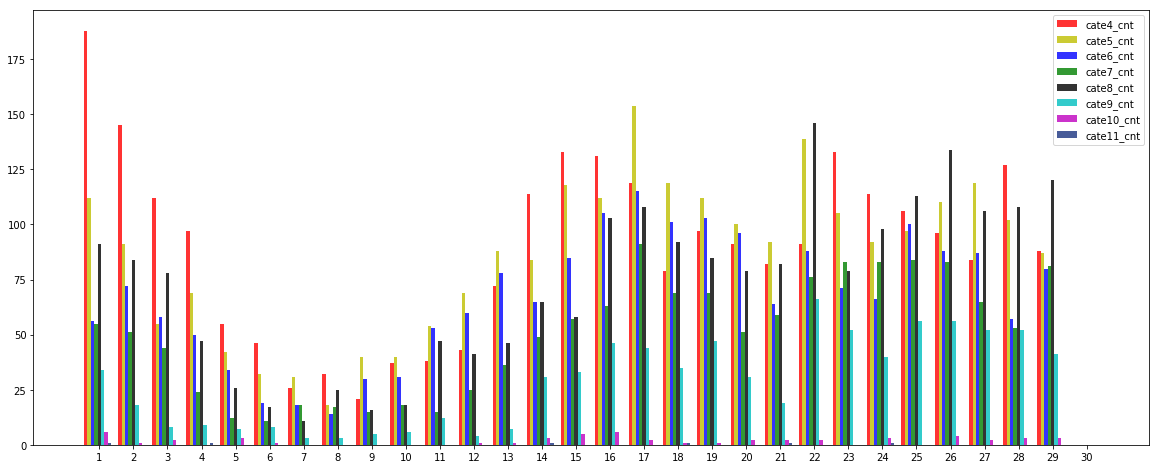

In [124]:
buy_cate_cnt_on_days(df_action, pd.to_datetime("2016-02-01"), pd.to_datetime("2016-03-01"))

1  ---------------
cate4_cnt 123
cate5_cnt 119
cate6_cnt 86
cate7_cnt 78
cate8_cnt 208
cate9_cnt 69
cate10_cnt 2
cate11_cnt 0
2  ---------------
cate4_cnt 87
cate5_cnt 86
cate6_cnt 77
cate7_cnt 69
cate8_cnt 199
cate9_cnt 48
cate10_cnt 1
cate11_cnt 0
3  ---------------
cate4_cnt 65
cate5_cnt 88
cate6_cnt 63
cate7_cnt 74
cate8_cnt 174
cate9_cnt 47
cate10_cnt 4
cate11_cnt 0
4  ---------------
cate4_cnt 76
cate5_cnt 80
cate6_cnt 67
cate7_cnt 84
cate8_cnt 175
cate9_cnt 43
cate10_cnt 2
cate11_cnt 2
5  ---------------
cate4_cnt 82
cate5_cnt 75
cate6_cnt 96
cate7_cnt 86
cate8_cnt 181
cate9_cnt 47
cate10_cnt 1
cate11_cnt 0
6  ---------------
cate4_cnt 90
cate5_cnt 64
cate6_cnt 68
cate7_cnt 67
cate8_cnt 199
cate9_cnt 45
cate10_cnt 1
cate11_cnt 0
7  ---------------
cate4_cnt 100
cate5_cnt 135
cate6_cnt 154
cate7_cnt 85
cate8_cnt 446
cate9_cnt 75
cate10_cnt 1
cate11_cnt 1
8  ---------------
cate4_cnt 265
cate5_cnt 182
cate6_cnt 155
cate7_cnt 167
cate8_cnt 493
cate9_cnt 68
cate10_cnt 2
cate11_cnt 0

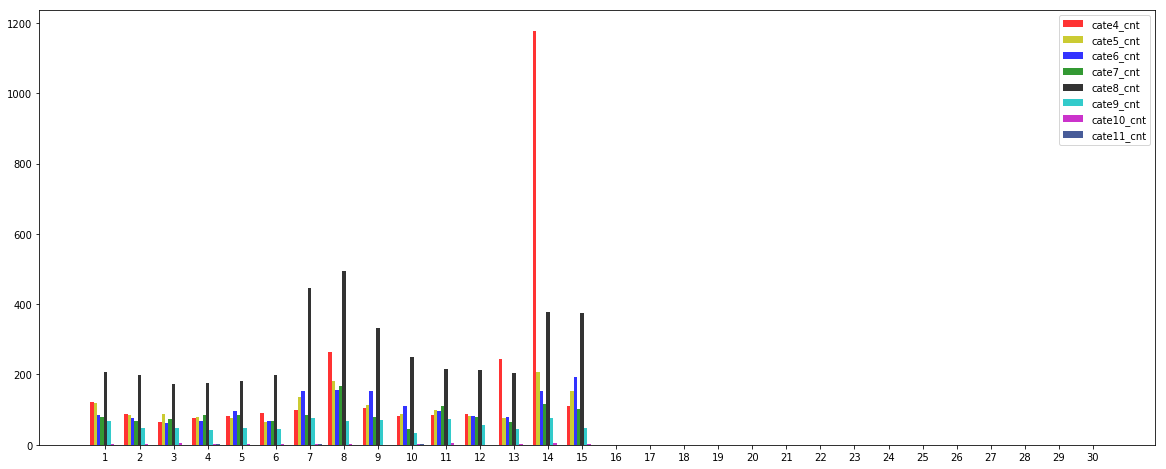

In [125]:
buy_cate_cnt_on_days(df_action, pd.to_datetime("2016-04-01"), pd.to_datetime("2016-04-16"))

In [17]:
!pwd

/workspace/mnt/group/face/liulinyun/lch
